<a href="https://colab.research.google.com/github/Griffin-Jordan/StormStocks/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
#from keras.utils.vis_utils import plot_model

In [13]:
df = pd.read_csv("/content/AAPL.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-28,18.895714,19.026787,18.647142,18.794287,16.554296,371968800
2014-03-03,18.693571,18.951786,18.671785,18.848572,16.602110,238781200
2014-03-04,18.964287,19.022858,18.848928,18.972857,16.711584,259140000
2014-03-05,18.961430,19.098213,18.897499,19.012857,16.746819,200062800
2014-03-06,19.028214,19.087143,18.860714,18.955357,16.696173,185488800


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-28,18.895714,19.026787,18.647142,18.794287,16.554296,371968800
1,2014-03-03,18.693571,18.951786,18.671785,18.848572,16.602110,238781200
2,2014-03-04,18.964287,19.022858,18.848928,18.972857,16.711584,259140000
3,2014-03-05,18.961430,19.098213,18.897499,19.012857,16.746819,200062800
4,2014-03-06,19.028214,19.087143,18.860714,18.955357,16.696173,185488800
...,...,...,...,...,...,...,...
2512,2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2513,2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45074500
2514,2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2515,2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900


<Axes: xlabel='Date'>

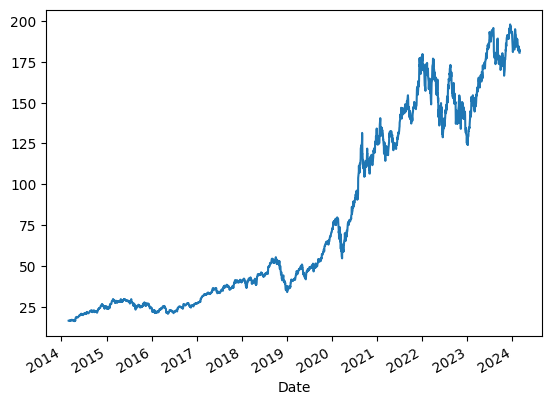

In [14]:
df['Adj Close'].plot()

In [15]:
output_var = pd.DataFrame(df['Adj Close'])

# Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [16]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2014-02-28,0.002194,0.002301,0.002156,0.472806
2014-03-03,0.001068,0.001886,0.002294,0.291811
2014-03-04,0.002576,0.002279,0.003285,0.319477
2014-03-05,0.002560,0.002695,0.003557,0.239195
2014-03-06,0.002932,0.002634,0.003351,0.219389


In [17]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [18]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [21]:
#Building LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))  # Fixed quotation marks around 'relu'
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')  # Fixed quotation marks around 'mean_squared_error' and 'adam'


In [22]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
287/287 [==============================] - 2s 2ms/step - loss: 6508.6182
Epoch 2/100
287/287 [==============================] - 1s 2ms/step - loss: 5379.3818
Epoch 3/100
287/287 [==============================] - 1s 5ms/step - loss: 3967.6326
Epoch 4/100
287/287 [==============================] - 1s 3ms/step - loss: 2578.9636
Epoch 5/100
287/287 [==============================] - 1s 2ms/step - loss: 1499.6609
Epoch 6/100
287/287 [==============================] - 1s 2ms/step - loss: 824.5957
Epoch 7/100
287/287 [==============================] - 1s 2ms/step - loss: 477.8799
Epoch 8/100
287/287 [==============================] - 1s 2ms/step - loss: 311.0023
Epoch 9/100
287/287 [==============================] - 1s 2ms/step - loss: 208.1759
Epoch 10/100
287/287 [==============================] - 1s 2ms/step - loss: 125.2975
Epoch 11/100
287/287 [==============================] - 1s 2ms/step - loss: 63.9846
Epoch 12/100
287/287 [==============================] - 1s 2ms/step - 

In [23]:
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


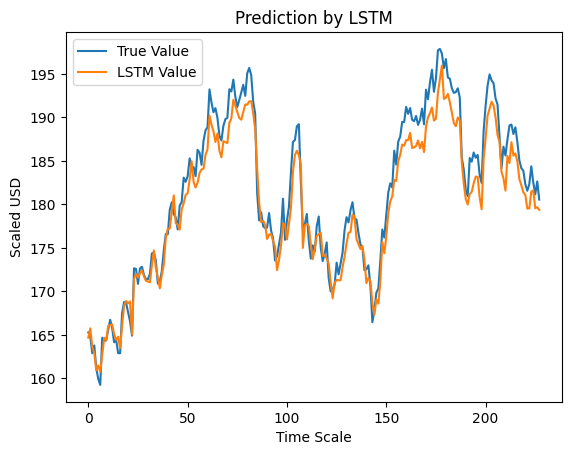

In [24]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()